<a href="https://colab.research.google.com/github/zasminah/Python_DataVisualization/blob/main/Pandas_Groupby_adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [25]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


# Aggregation

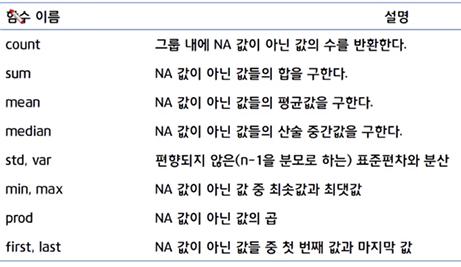

In [26]:
grouped = tips.groupby(['sex','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Male    Yes       0.152771
        No        0.160669
Female  Yes       0.182150
        No        0.156921
Name: tip_pct, dtype: float64

In [27]:
grouped_pct.agg(['mean','std'])

mean       std
sex    smoker                    
Male   Yes     0.152771  0.090588
       No      0.160669  0.041849
Female Yes     0.182150  0.071595
       No      0.156921  0.036421

In [28]:
grouped_pct.agg([('s_mean','mean'), ('sm_mean','std')])

s_mean   sm_mean
sex    smoker                    
Male   Yes     0.152771  0.090588
       No      0.160669  0.041849
Female Yes     0.182150  0.071595
       No      0.156921  0.036421

In [29]:
grouped.agg({'tip_pct':['min','max','std'],'size':['sum','mean']})

tip_pct                     size          
                    min       max       std  sum      mean
sex    smoker                                             
Male   Yes     0.035638  0.710345  0.090588  150  2.500000
       No      0.071804  0.291990  0.041849  263  2.711340
Female Yes     0.056433  0.416667  0.071595   74  2.242424
       No      0.056797  0.252672  0.036421  140  2.592593

# Apply

In [30]:
def top(df, n=5, column='tip_pct'):
  return df.sort_values(by=column)[-n:]

tips.groupby(['smoker','day']).apply(top,n=2, column='total_bill')


total_bill    tip     sex smoker   day    time  size   tip_pct
smoker day                                                                     
Yes    Thur 83        32.68   5.00    Male    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00  Female    Yes  Thur   Lunch     4  0.115982
       Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Male    Yes   Fri  Dinner     4  0.117750
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Male    Yes   Sat  Dinner     3  0.196812
       Sun  184       40.55   3.00    Male    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Male    Yes   Sun  Dinner     3  0.077178
No     Thur 85        34.83   5.17  Female     No  Thur   Lunch     4  0.148435
            142       41.19   5.00    Male     No  Thur   Lunch     5  0.121389
       Fri  91        22.49   3.50    Male     No   Fri  Dinner     2  0.155625
            94        22.75   3.25  Female     No   Fri  Dinner     2  0.142857
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4  0.139424
            212       48.33   9.00    Male     No   Sat  Dinner     4  0.186220
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3  0.105070
            156       48.17   5.00    Male     No   Sun  Dinner     6  0.103799

In [32]:
states = ['Ohio','New York','Vermont','Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East']*4+['West']*4

data = pd.Series(np.random.randn(8), index=states)
data[['Vermont','Nevada','Idaho']]=np.nan
data


Ohio          0.076436
New York     -0.556553
Vermont            NaN
Florida       2.001777
Oregon       -0.092907
Nevada             NaN
California   -0.731189
Idaho              NaN
dtype: float64

In [35]:
fill_mean = lambda g: g.fillna(g.mean())

data.groupby(group_key).apply(fill_mean)

Ohio          0.076436
New York     -0.556553
Vermont       0.507220
Florida       2.001777
Oregon       -0.092907
Nevada       -0.412048
California   -0.731189
Idaho        -0.412048
dtype: float64

In [37]:
fill_values = {'East':0.5, 'West':-1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.076436
New York     -0.556553
Vermont       0.500000
Florida       2.001777
Oregon       -0.092907
Nevada       -1.000000
California   -0.731189
Idaho        -1.000000
dtype: float64

# Pivot Table

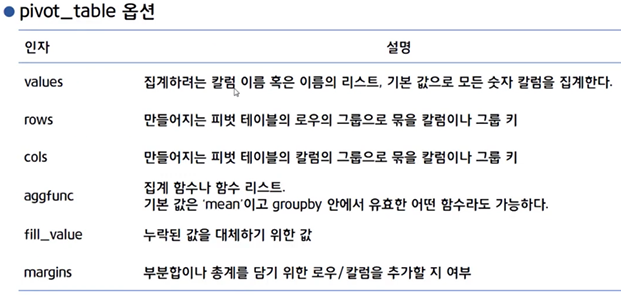

In [38]:
tips.pivot_table(index=['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Male   Yes     2.500000  3.051167  0.152771   22.284500
       No      2.711340  3.113402  0.160669   19.791237
Female Yes     2.242424  2.931515  0.182150   17.977879
       No      2.592593  2.773519  0.156921   18.105185

In [39]:
tips.pivot_table(index=['sex','day'],columns='smoker')

size                 tip  ...   tip_pct total_bill           
smoker            Yes        No       Yes  ...        No        Yes         No
sex    day                                 ...                                
Male   Thur  2.300000  2.500000  3.058000  ...  0.165706  19.171000  18.486500
       Fri   2.125000  2.000000  2.741250  ...  0.138005  20.452500  17.475000
       Sat   2.629630  2.656250  2.879259  ...  0.162132  21.837778  19.929063
       Sun   2.600000  2.883721  3.521333  ...  0.158291  26.141333  20.403256
Female Thur  2.428571  2.480000  2.990000  ...  0.155971  19.218571  16.014400
       Fri   2.000000  2.500000  2.682857  ...  0.165296  12.654286  19.365000
       Sat   2.200000  2.307692  2.868667  ...  0.147993  20.266667  19.003846
       Sun   2.500000  3.071429  3.500000  ...  0.165710  16.540000  20.824286

[8 rows x 8 columns]

In [41]:
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker')

size             tip_pct          
smoker            Yes        No       Yes        No
sex    day                                         
Male   Thur  2.300000  2.500000  0.164417  0.165706
       Fri   2.125000  2.000000  0.144730  0.138005
       Sat   2.629630  2.656250  0.139067  0.162132
       Sun   2.600000  2.883721  0.173964  0.158291
Female Thur  2.428571  2.480000  0.163073  0.155971
       Fri   2.000000  2.500000  0.209129  0.165296
       Sat   2.200000  2.307692  0.163817  0.147993
       Sun   2.500000  3.071429  0.237075  0.165710

In [42]:
tips.pivot_table('tip_pct', 
                 index=['sex','day'],
                 columns='smoker',
                 aggfunc=len)

smoker        Yes    No
sex    day             
Male   Thur  10.0  20.0
       Fri    8.0   2.0
       Sat   27.0  32.0
       Sun   15.0  43.0
Female Thur   7.0  25.0
       Fri    7.0   2.0
       Sat   15.0  13.0
       Sun    4.0  14.0